Filtering in the frequency domain (HPF, LPF,
BPF, and notch filters)


In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit


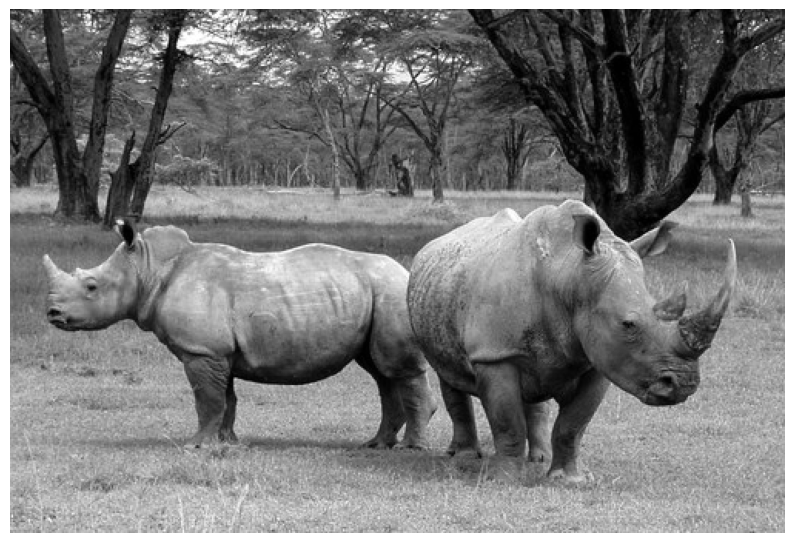

((np.float64(-0.5), np.float64(502.5), np.float64(339.5), np.float64(-0.5)),
 None)

In [3]:
im = np.array(Image.open('./images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray),
pylab.axis('off'), pylab.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19164\3242416758.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


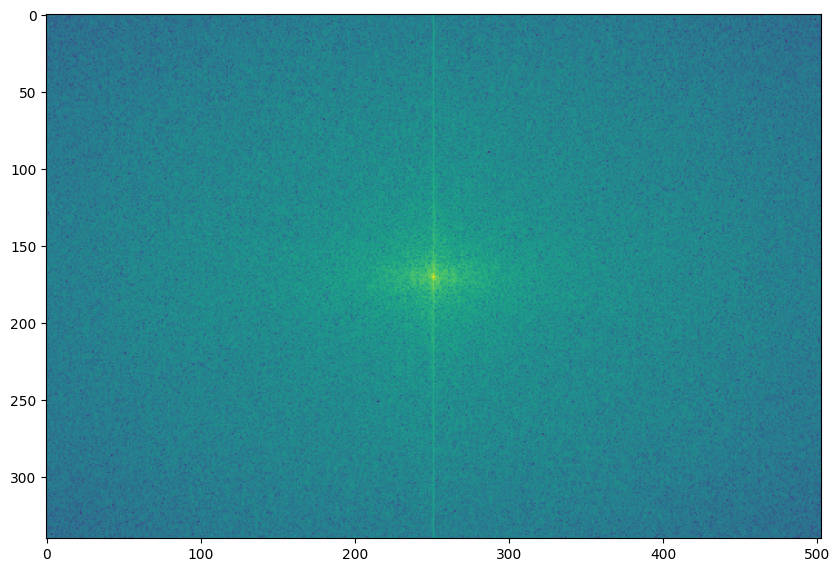

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [4]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19164\704085493.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


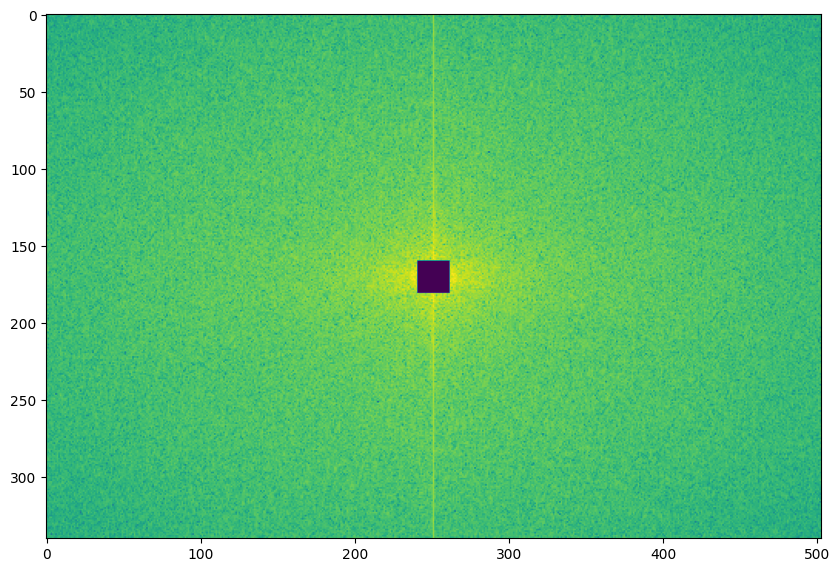

In [5]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()


0.5900850483418348


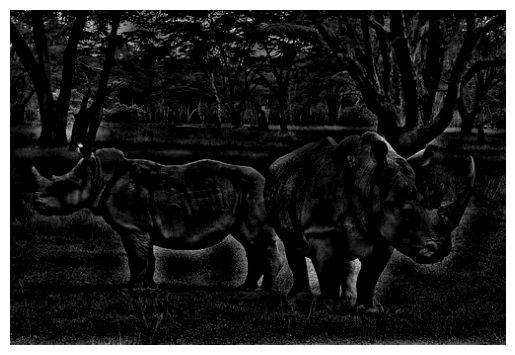

In [8]:
from scipy import fftpack
import numpy as np
import pylab

def signaltonoise(image, axis=None, ddof=0):
    mean = np.mean(image, axis=axis)
    std_dev = np.std(image, axis=axis, ddof=ddof)
    return mean / std_dev

# Thực hiện Inverse Fourier Transform
im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real, 0, 255)  # clip pixel values after IFFT

# Tính Signal-to-Noise Ratio (SNR)
print(signaltonoise(im1, axis=None))  # Kết quả: 0.5901647786775175

# Hiển thị hình ảnh
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19164\132624032.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1].imshow((20 * np.log10(0.1 + freq2)).astype(int))
C:\Users\PC\AppData\Local\Temp\ipykernel_19164\132624032.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[2].imshow((20 * np.log10(0.1 + freq2)).astype(int))


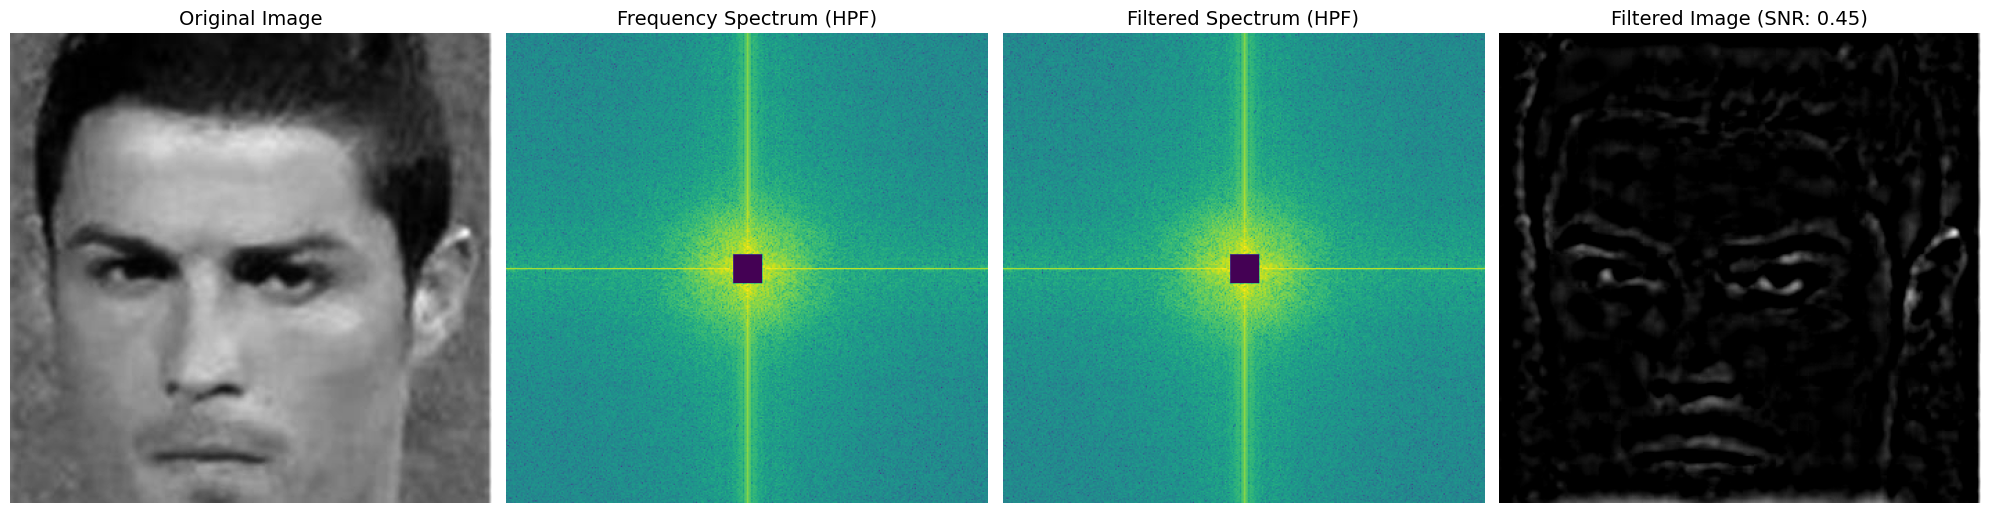

In [17]:
import numpy as np
from PIL import Image
from scipy import fftpack as fp
import pylab
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang grayscale
im = np.array(Image.open('./images/ronaldo.jpg').convert('L'))

# Chuyển đổi ảnh sang miền tần số
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)

# Áp dụng bộ lọc thông cao (HPF)
freq2[half_w-10:half_w+11, half_h-10:half_h+11] = 0

# Thực hiện Inverse Fourier Transform để tái tạo ảnh
im1 = np.clip(fp.ifft2(fp.ifftshift(freq2)).real, 0, 255)

# Hàm tính Signal-to-Noise Ratio (SNR)
def signaltonoise(image, axis=None, ddof=0):
    mean = np.mean(image, axis=axis)
    std_dev = np.std(image, axis=axis, ddof=ddof)
    return mean / std_dev

# Tính SNR
snr = signaltonoise(im1, axis=None)

# Hiển thị các ảnh trong cùng một khung
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Ảnh gốc
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

# Phổ tần số ban đầu
axes[1].imshow((20 * np.log10(0.1 + freq2)).astype(int))
axes[1].set_title('Frequency Spectrum (HPF)', fontsize=14)
axes[1].axis('off')

# Phổ sau khi áp dụng HPF
axes[2].imshow((20 * np.log10(0.1 + freq2)).astype(int))
axes[2].set_title('Filtered Spectrum (HPF)', fontsize=14)
axes[2].axis('off')

# Ảnh sau khi áp dụng HPF
axes[3].imshow(im1, cmap='gray')
axes[3].set_title(f'Filtered Image (SNR: {snr:.2f})', fontsize=14)
axes[3].axis('off')

# Hiển thị tất cả
plt.tight_layout()
plt.show()


Low-pass filter (LPF)

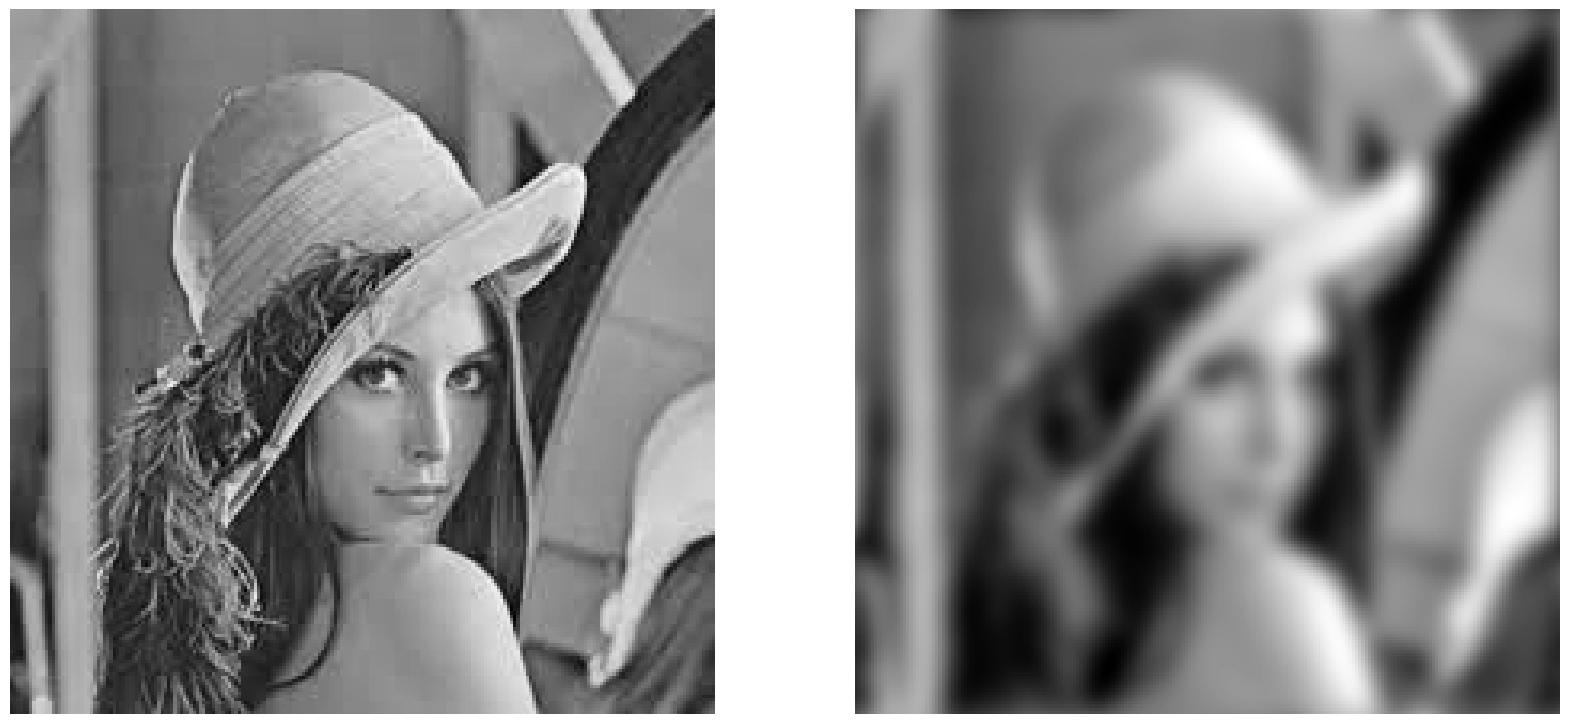

In [19]:
import numpy.fft as fp
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale
im = np.mean(imread('./images/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginarypart is an artifact
axes2.axis('off')
pylab.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19164\3943492472.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 +numpy.fft.fftshift(freq_gaussian))).astype(int))


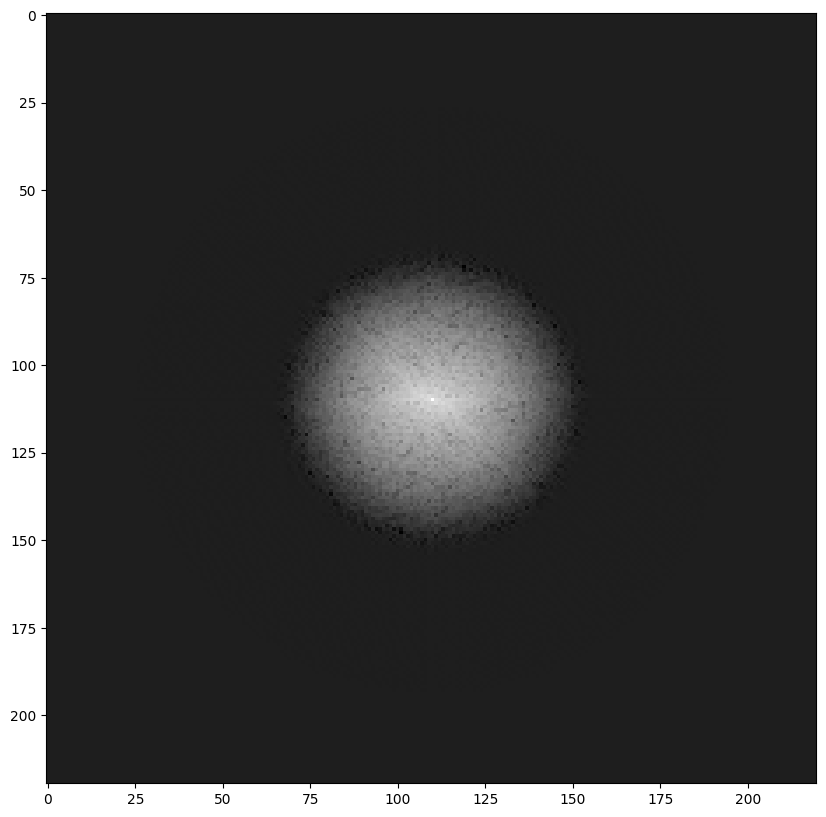

In [20]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()


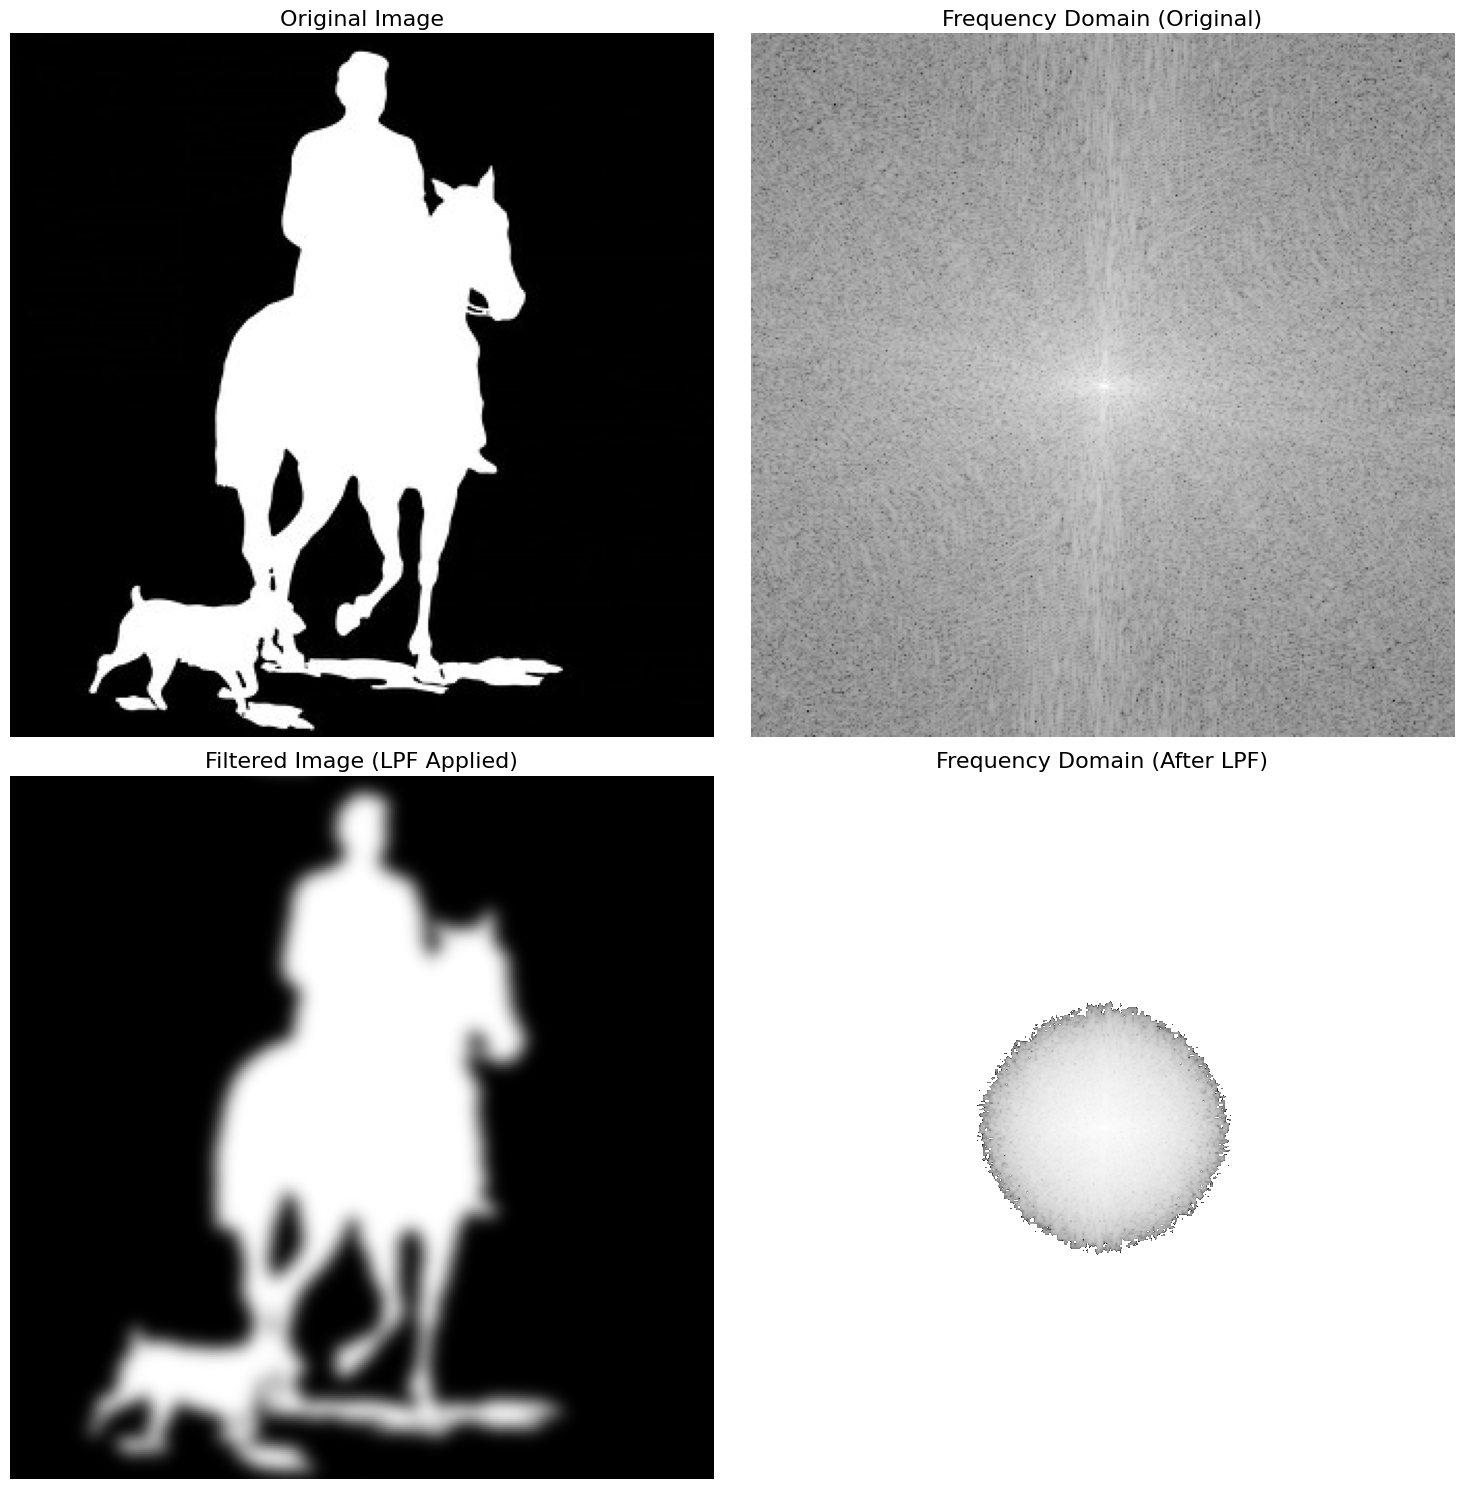

In [25]:
import numpy.fft as fp
import numpy as np
from scipy import ndimage
from matplotlib import pylab
from matplotlib.colors import LogNorm
from matplotlib import cm

# Đọc và chuyển đổi ảnh sang grayscale
im = np.mean(pylab.imread('./images/horse-dog.jpg'), axis=2)

# Chuyển đổi sang miền tần số
freq = fp.fft2(im)

# Áp dụng Gaussian LPF trong miền tần số
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)

# Chuyển ngược về miền không gian sau khi áp dụng LPF
im_filtered = fp.ifft2(freq_gaussian).real

# Chuẩn bị hiển thị
fig, axes = pylab.subplots(2, 2, figsize=(15, 15))

# Ảnh gốc
axes[0, 0].imshow(im, cmap='gray')
axes[0, 0].set_title('Original Image', fontsize=16)
axes[0, 0].axis('off')

# Miền tần số gốc
axes[0, 1].imshow(20 * np.log10(0.1 + np.abs(fp.fftshift(freq))), cmap='gray', norm=LogNorm())
axes[0, 1].set_title('Frequency Domain (Original)', fontsize=16)
axes[0, 1].axis('off')

# Ảnh sau khi áp dụng LPF
axes[1, 0].imshow(im_filtered, cmap='gray')
axes[1, 0].set_title('Filtered Image (LPF Applied)', fontsize=16)
axes[1, 0].axis('off')

# Miền tần số sau LPF
axes[1, 1].imshow(20 * np.log10(0.1 + np.abs(fp.fftshift(freq_gaussian))), cmap='gray', norm=LogNorm())
axes[1, 1].set_title('Frequency Domain (After LPF)', fontsize=16)
axes[1, 1].axis('off')

pylab.tight_layout()
pylab.show()


Band-pass filter (BPF) with DoG

C:\Users\PC\AppData\Local\Temp\ipykernel_19164\1771863238.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kernel_1d /= np.trapz(kernel_1d)  # Normalize the sum to 1
C:\Users\PC\AppData\Local\Temp\ipykernel_19164\1771863238.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kernel_1d /= np.trapz(kernel_1d)  # Normalize the sum to 1


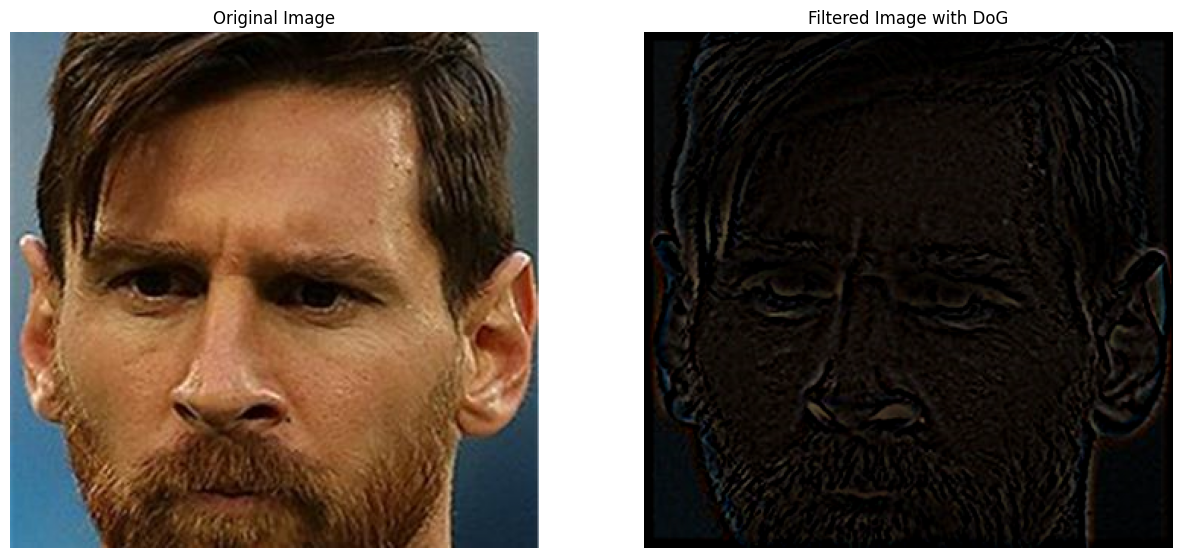

In [30]:
import numpy as np
from skimage import img_as_float
from scipy import signal
import pylab

# Đọc ảnh và chuyển đổi thành ảnh float
im = img_as_float(pylab.imread('./images/messi.jpg'))

# Tạo subplots
fig, axes = pylab.subplots(1, 2, figsize=(15, 7))

# Hiển thị ảnh gốc
axes[0].imshow(im)
axes[0].axis('off')
axes[0].set_title("Original Image")

# Tạo kernel Gaussian 1D
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005 * x ** 2)
kernel_1d /= np.trapz(kernel_1d)  # Normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]

# Tạo kernel Gaussian 2 và tính DoG
kernel_1d = np.exp(-5 * x ** 2)
kernel_1d /= np.trapz(kernel_1d)  # Normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]

# Áp dụng filter DoG lên ảnh
im_filtered = signal.fftconvolve(im, DoGKernel, mode='same')

# Hiển thị ảnh sau khi áp dụng DoG filter
axes[1].imshow(np.clip(im_filtered, 0, 1))
axes[1].axis('off')
axes[1].set_title("Filtered Image with DoG")

# Hiển thị ảnh
pylab.show()


Band-stop (notch) filter

(341, 509)


C:\Users\PC\AppData\Local\Temp\ipykernel_19164\1119183939.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),cmap=pylab.cm.gray)
C:\Users\PC\AppData\Local\Temp\ipykernel_19164\1119183939.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),


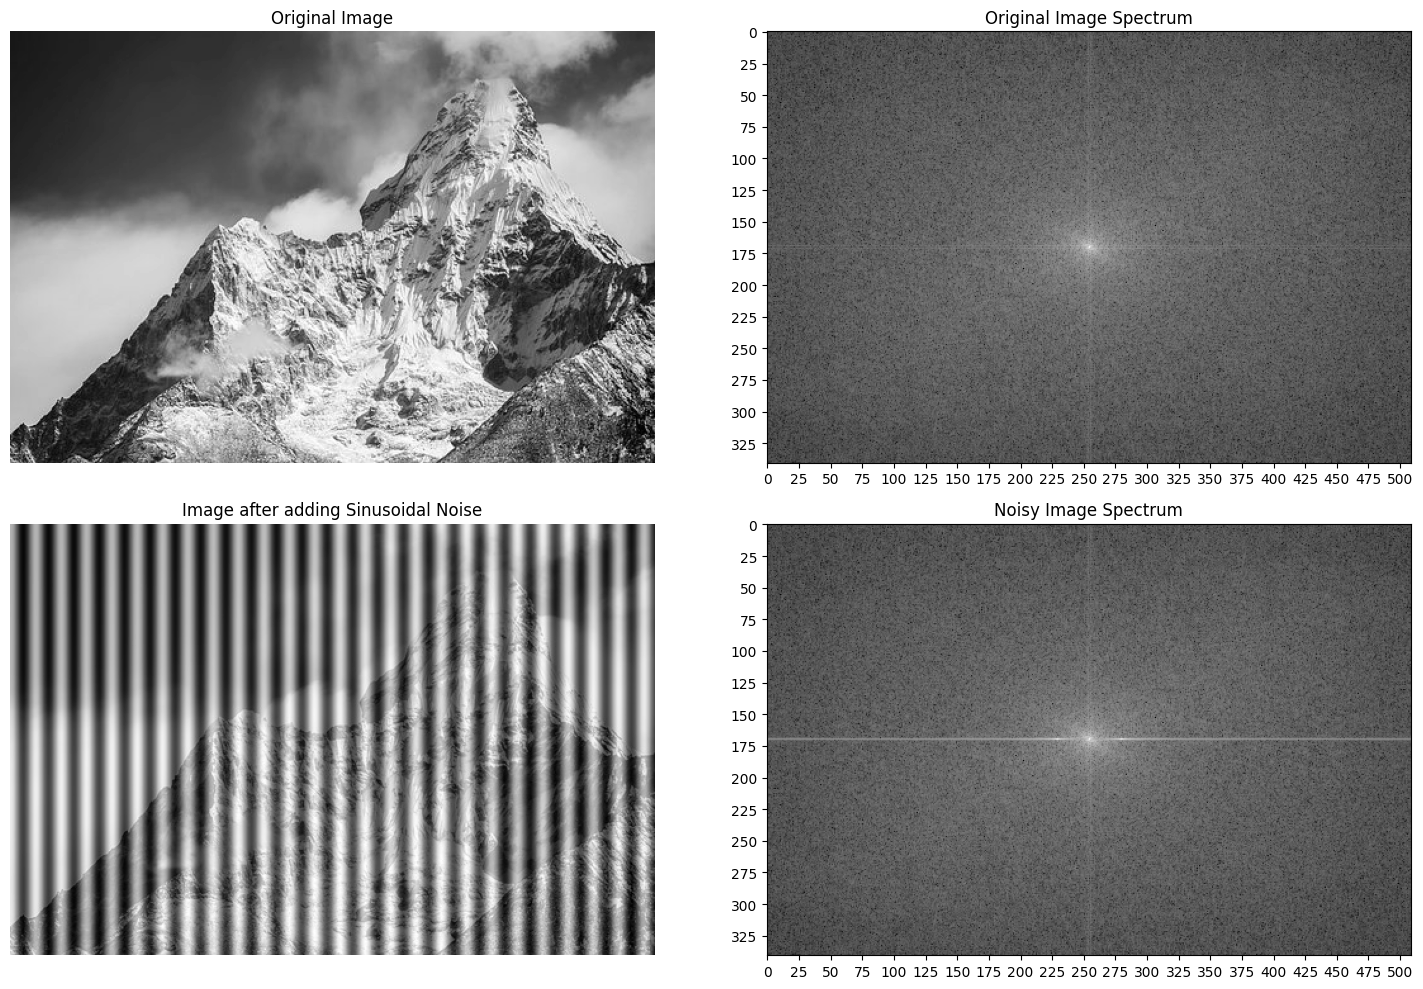

In [35]:
from scipy import fftpack
pylab.figure(figsize=(15,10))
im = np.mean(imread("./images/mountain.png"), axis=2) / 255
print(im.shape)
pylab.subplot(2,2,1), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image')
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Original Image Spectrum')
# add periodic noise to the image
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
pylab.subplot(2,2,3), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Image after adding Sinusoidal Noise')
F1 = fftpack.fft2((im).astype(float)) # noisy spectrum
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),
                                    cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Noisy Image Spectrum')
pylab.tight_layout()
pylab.show()

Deconvolution and inverse filtering with FFT

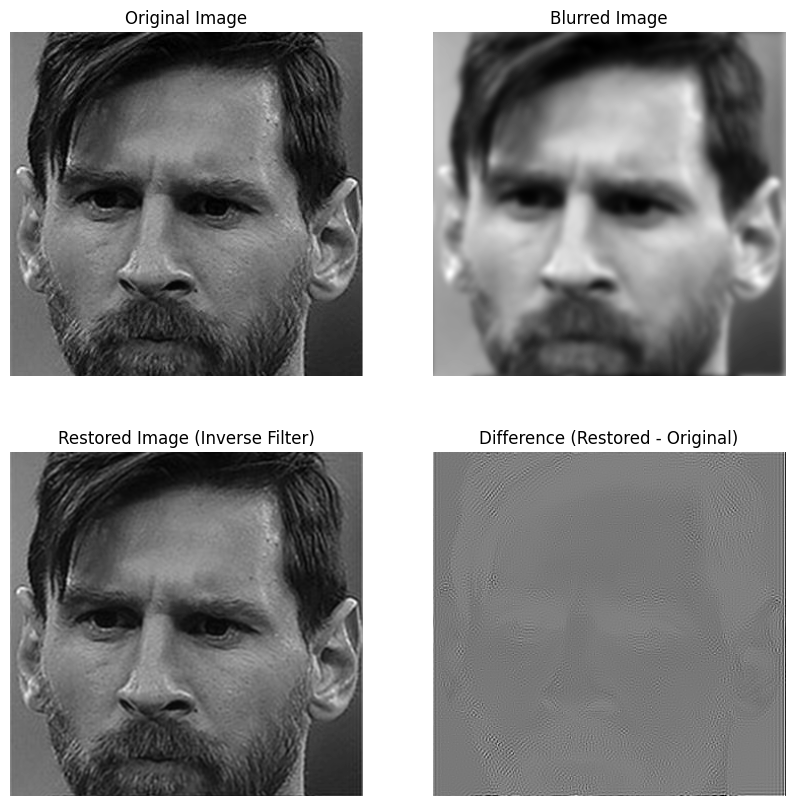

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack as fp
from scipy.stats import norm
from skimage.io import imread
from skimage.color import rgb2gray

# Đọc ảnh và chuyển đổi sang ảnh xám
im = 255 * rgb2gray(imread('./images/messi.jpg'))

# Tạo Gaussian kernel 2D bằng scipy.stats.norm
size_x = im.shape[0]
size_y = im.shape[1]
sigma = 3  # độ lệch chuẩn cho Gaussian kernel
x = np.linspace(-size_x // 2, size_x // 2, size_x)
y = np.linspace(-size_y // 2, size_y // 2, size_y)
gaussian_1d_x = norm.pdf(x, 0, sigma)
gaussian_1d_y = norm.pdf(y, 0, sigma)

# Tạo kernel Gaussian 2D
gauss_kernel = np.outer(gaussian_1d_x, gaussian_1d_y)

# Biến đổi Fourier của ảnh và kernel
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))  # Lấy H từ kernel

# Thực hiện tích chập theo lý thuyết (convolution theorem)
convolved = freq * freq_kernel

# Chuyển đổi ngược về không gian không gian (inverse FFT) và chuẩn hóa ảnh
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur)  # chuẩn hóa ảnh về khoảng [0, 255]

# Khôi phục ảnh bằng bộ lọc ngược (inverse filter)
epsilon = 10**-6  # Tránh chia cho 0
freq = fp.fft2(im_blur)
freq_kernel_inv = 1 / (epsilon + freq_kernel)  # Inverse filter H^-1
convolved_restored = freq * freq_kernel_inv
im_restored = fp.ifft2(convolved_restored).real
im_restored = 255 * im_restored / np.max(im_restored)  # Chuẩn hóa ảnh

# Hiển thị ảnh gốc, ảnh mờ, ảnh khôi phục và sự khác biệt
plt.figure(figsize=(10, 10))

# Ảnh gốc
plt.subplot(221), plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ảnh mờ
plt.subplot(222), plt.imshow(im_blur, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

# Ảnh khôi phục với bộ lọc ngược
plt.subplot(223), plt.imshow(im_restored, cmap='gray')
plt.title('Restored Image (Inverse Filter)')
plt.axis('off')

# Sự khác biệt giữa ảnh gốc và ảnh khôi phục
plt.subplot(224), plt.imshow(im_restored - im, cmap='gray')
plt.title('Difference (Restored - Original)')
plt.axis('off')

plt.show()

